也称为簇，组间相似度低
无监督学习
可以在实现不知道正确结果的情况下，发现数据的本身所蕴含的结构等信息
可以是单独过程，也可以作为其他任务的前驱

In [2]:
#sklearn中有函数make bolds可以专门生成聚类的测试数据
#Kmeans方法可以做聚类算法
'''中心的定义
    ①centroid – 质心（中心点、均值）
    ②mode – 众数
    '''
#SSE簇惯性

'中心的定义\n    ①centroid – 质心（中心点、均值）\n    ②mode – 众数\n    '

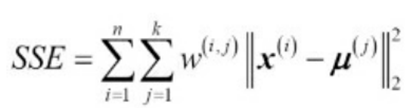

In [3]:
# 随机选择k个点作为簇中心
# 当任意一个点的簇分配结果发生改变时
#       对数据集中的每一个数据点
#             对每一个质心
#                     计算质心与数据点的距离
#              将数据点分配到距离最近的簇
#       对每一个簇，计算簇中所有点的均值，并将均值作为质心

## Kmeans

In [61]:
#import numpy as np
from numpy import *

# 二维点之间的距离
def dist(x1, x2):
    return sqrt(sum(power(x1 - x2, 2))) 

# 选取k个点
def choosecenter(dataset, k):
    m = dataset.shape[0]
    n = dataset.shape[1]
    centroid = zeros((n, k)) # centroid是n行k列
    arr = np.arange(0,n)      # 生成0-m-1
    random.shuffle(arr)    # 打乱顺序    
    rand_indices = arr[:k]    # 取前K个
    centroid = dataset[:, rand_indices]
    return centroid
    
# Kmeans 算法
def Kmeans(dataset, k=3):
    m = dataset.shape[0]
    clusterAssment = zeros((m,2))    # 用于存放该样本属于哪类及质心距离
    # clusterAssment第一列放数据对应的中心点，第二列放数据到中心点的距离
    centroids = choosecenter(dataset, k)
    clusterChanged = True   # 用来判断聚类是否已经收敛
    while clusterChanged:
        clusterChanged = False;
        # 把每一个数据点划分到离它最近的中心点
        for i in range(m):  
            minDist = 0.0;
            minIndex = -1;
            for j in range(k):
                distJI = dist(centroids[j,:], dataset[i,:])
                if distJI < minDist:
                    minDist = distJI;
                    minIndex = j  # 如果第i个数据点到第j个中心点更近，则将i归属为j
            if clusterAssment[i,0] != minIndex:
                clusterChanged = True;  # 如果分配发生变化，则需要继续迭代
            clusterAssment[i,:] = minIndex,minDist**2   # 并将第i个数据点的分配情况存入字典
        # print centroids
        # 重新计算中心点
        for cent in range(k):
            clusterAssment1 = squeeze(nonzero(clusterAssment[:,0]))
            ptsInClust = dataset[array(clusterAssment1) == cent[0]]   # 去第一列等于cent的所有列
            centroids[cent,:] = mean(ptsInClust, axis = 0)  # 算出这些数据的中心点
    return centroids, clusterAssment